# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-mhx6UJW0-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 75133.13 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 101633.27 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 122947.93 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 135225.77 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 144911.53 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 155697.37 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 78513.77 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 111837.98 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 129553.77 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 137897.55 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 136863.62 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.38 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.18 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.07 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.11 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.15 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.66 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.44 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.39 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.35 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.21 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.48 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.72 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.32 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.20 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.13 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.59 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 48.92 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.63 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.35 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.34 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.70 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.74 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.94 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 48.19 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.01 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.63 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.02 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.30 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.61 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.84 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 36.35 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.66 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.65 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.09 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 41.14 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 44.95 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 43.85 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 43.90 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.84 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.66 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.54 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.76 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.31 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.61 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.95 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.13 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.15 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.93 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.94 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.70 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.63 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.46 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.97 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.18 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 46.83 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.06 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.39 examples/s]

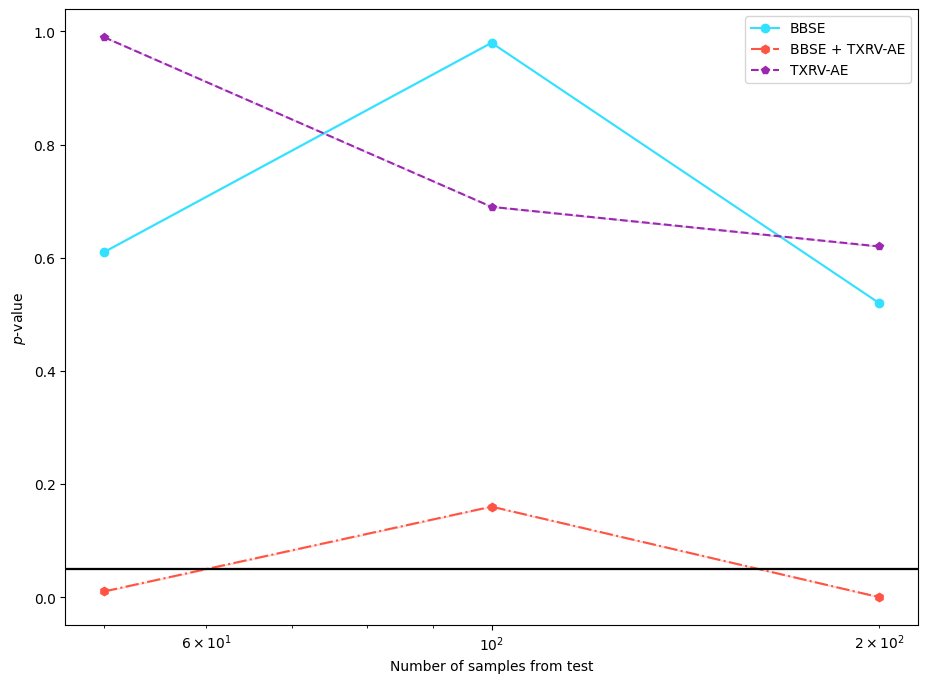

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.90 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.40 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.01 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.39 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.22 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.65 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.32 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.30 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.22 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.34 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.86 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.63 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.74 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.50 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.67 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.65 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.66 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.58 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.43 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.39 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 33.27 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.90 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.91 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.67 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.05 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.71 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.86 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.70 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.69 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.72 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.99 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.04 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.87 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.52 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.32 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.31 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.70 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.36 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.09 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.74 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.38 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.96 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.29 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.78 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.23 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.62 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.48 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.61 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.40 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.36 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.00 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.54 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.95 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.76 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.32 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.47 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.68 examples/s]

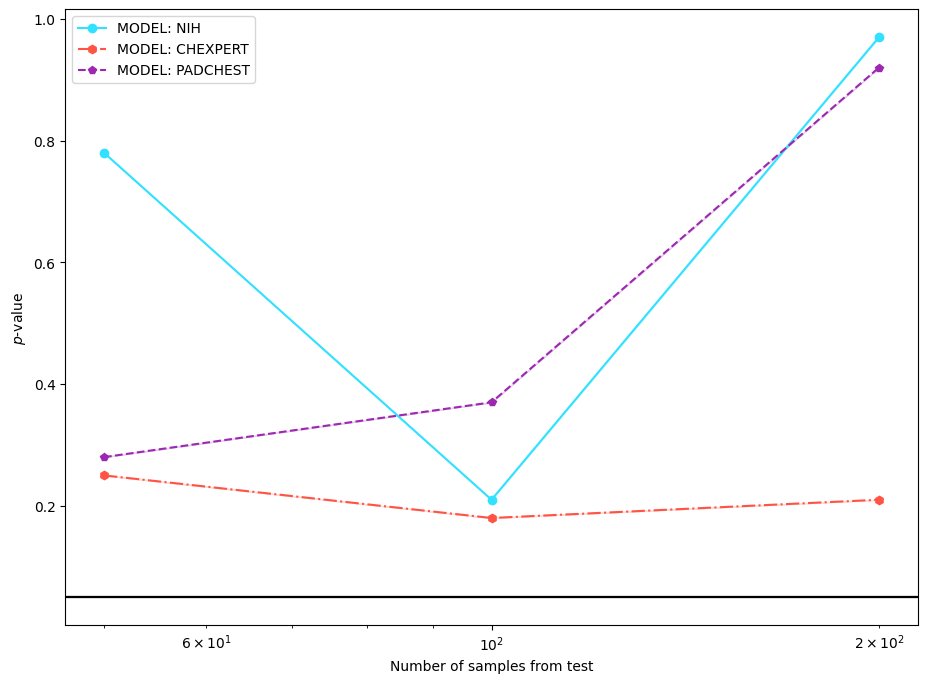

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 55498.76 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 81776.96 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 95249.78 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 104466.78 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 111071.56 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 113884.08 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52755.29 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71381.03 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84874.28 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 96085.54 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 115458.45 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 126936.87 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.21 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.72 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.57 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.11 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.68 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.48 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.15 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.78 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.88 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.25 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.04 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.49 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.91 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.51 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.49 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.29 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.78 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.38 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.81 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53575.60 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 74266.10 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 89754.77 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 100364.71 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 107888.27 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 112999.53 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 56645.62 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 82749.83 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 97501.45 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 101531.20 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 109157.73 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 114118.22 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.80 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.82 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.93 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.51 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.59 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.79 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.64 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.85 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.85 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.67 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.65 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.48 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.33 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.93 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.92 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.31 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.94 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.52 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.09 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 57049.93 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 77649.27 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 97742.42 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 104625.29 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 114848.52 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 116102.33 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51526.46 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 74557.53 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84651.56 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 95779.70 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 105407.58 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 112376.88 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.99 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.55 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.40 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.05 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.09 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.17 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.99 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.53 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.62 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.38 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.00 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.27 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.50 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.27 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.05 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.00 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.15 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.14 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.84 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 56900.33 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 82180.15 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 89691.41 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 102914.27 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 108512.54 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 110611.02 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 55956.87 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 82395.08 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 97295.81 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 106631.01 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 112340.52 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 117206.18 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.40 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.80 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.51 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.15 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.71 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.67 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.22 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.57 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.48 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 19.01 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.96 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.43 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.25 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.76 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.42 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.76 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.59 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.48 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.43 examples/s]

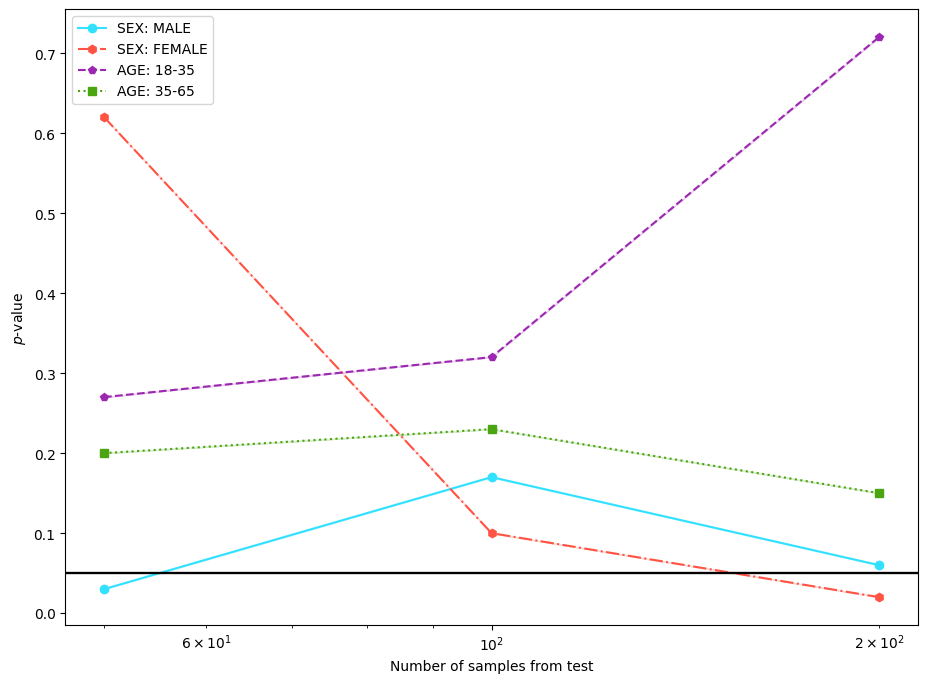

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.88 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.49 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.10 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.79 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.00 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.89 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.03 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.93 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.83 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.29 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.12 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.75 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.57 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.76 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.60 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.64 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.42 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.29 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.08 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.63 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.65 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.13 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.73 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.46 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.20 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.02 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.35 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.82 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.18 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.90 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.19 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.12 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.64 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.87 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.37 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.03 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.38 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.59 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.67 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.36 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.58 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.43 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.74 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.44 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.41 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.73 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 27.03 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.30 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.56 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.87 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.22 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.66 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.66 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.65 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.74 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.60 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.95 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.07 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.44 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.82 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.88 examples/s]

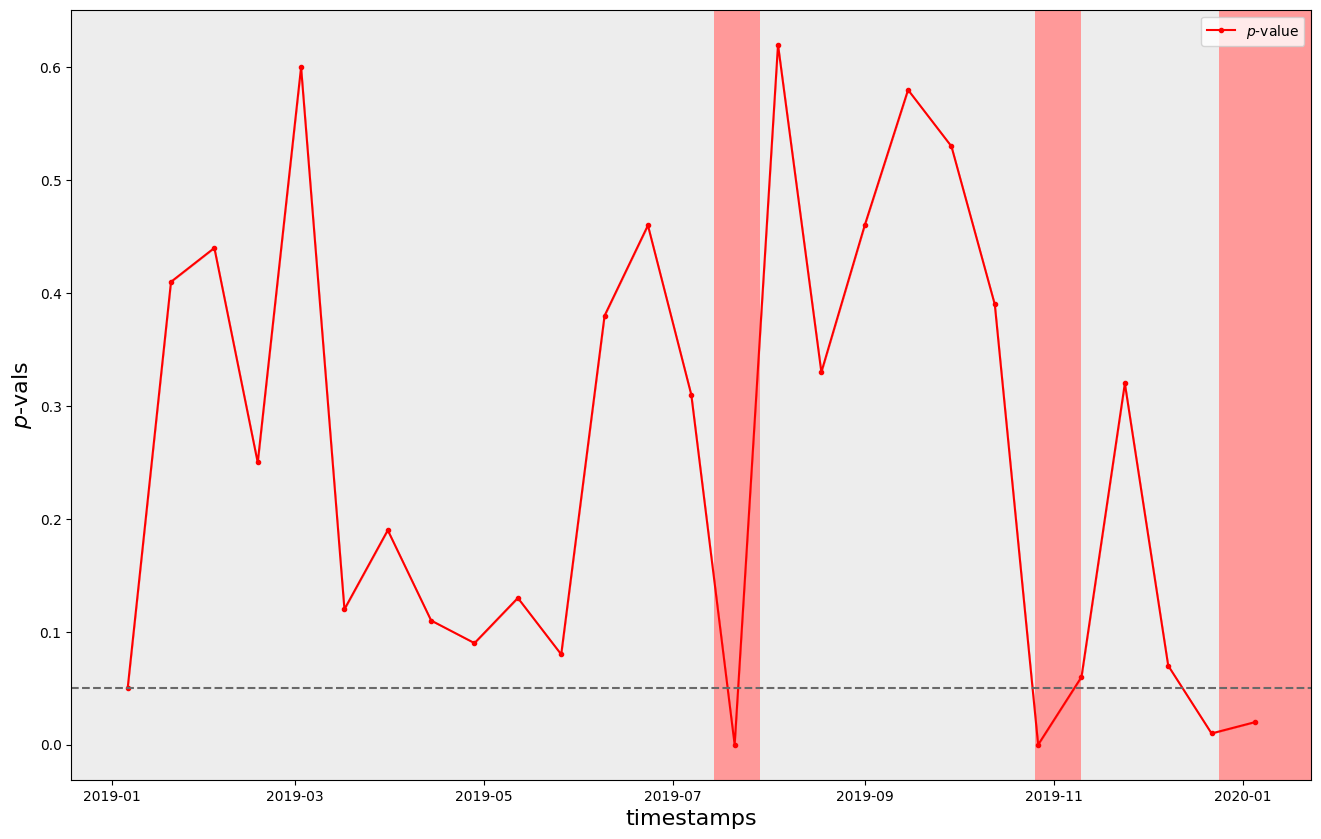

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)